### Problem Statment
As a Deep Learning Engineer in the company, you are given historical data with respect to multiple regions of India and years (2005 to 2016)

Your goal is to forecast sales for the years 2017 and 2018

### Data DesDescription: Historical sales data of XYZ company from 2005 to 2016. 
Attribute Information:
1. HQ - This attribute represents HeadQuarters of the company.
2. Country - This attribute represents the country of the outlet.
3. State_of_outlet - This attribute represents the state of the outlet.
4. City_of_outlet - This attribute represents the city of the outlet.
5. Month - This attribute represents month(ranging from 1 to 12 )
6. Day - This attribute represents day of the month(ranging from 1 to 31)
7. Year - This attribute represents year(ranging from 2005 to 2016)
8. Total_Sales - Target variable (total sales on particular day). This is basically the sale index
value. For eg: if value is 60 then you can assume total sale happened is 60*10,000 USD.

### Installing Tensorflow 2.0.0

In [ ]:
!pip install tensorflow==2.0.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.0.0


### Import Libraries

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from datetime import date
from sklearn.preprocessing import MinMaxScaler
from numpy import array
import pandas as pd
import os 

import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 15 and 10 are width and height in inches respectively
plt.rcParams['figure.figsize'] = (15,10)

### Drive Mounting.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir("/content/drive/MyDrive/DeepL/LSTM EXAM DP/Dataset")

In [ ]:
!dir

Sales\ Forecasting_Train\ Data.xlsx


### Importing data

In [ ]:
# importing data
df = pd.read_excel('Sales Forecasting_Train Data.xlsx')

In [ ]:
df.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1.0,1.0,2005.0,72.2
1,Asia,India,NaN,Bombay (Mumbai),1.0,2.0,2005.0,72.7
2,Asia,India,NaN,Bombay (Mumbai),1.0,3.0,2005.0,74.3
3,Asia,India,NaN,Bombay (Mumbai),1.0,4.0,2005.0,78.9
4,Asia,India,NaN,Bombay (Mumbai),1.0,5.0,2005.0,81.5


In [ ]:
# 'shape' function returns a tuple that gives the total number of rows and columns in the data
df.shape

(17536, 8)

In [ ]:
#Checking the Null Values in data
df.isnull()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
17531,False,False,True,False,False,False,False,False
17532,False,False,True,False,False,False,False,False
17533,False,False,True,False,False,False,False,False
17534,False,False,True,False,False,False,False,False


In [ ]:
# use drop() to drop the redundant variables
# 'axis = 1' drops the corresponding columns
df.drop('State_of_outlet', axis=1, inplace= True)

df.head(5)

,HQ,Country,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,Bombay (Mumbai),1.0,1.0,2005.0,72.2
1,Asia,India,Bombay (Mumbai),1.0,2.0,2005.0,72.7
2,Asia,India,Bombay (Mumbai),1.0,3.0,2005.0,74.3
3,Asia,India,Bombay (Mumbai),1.0,4.0,2005.0,78.9
4,Asia,India,Bombay (Mumbai),1.0,5.0,2005.0,81.5


In [ ]:
df.columns

Index(['HQ', 'Country', 'City_of_outlet', 'Month', 'Day', 'Year',
       'Total_Sales'],
      dtype='object')

In [ ]:
df_Ani = df.select_dtypes('object')

### Exploratory Data Analysis.

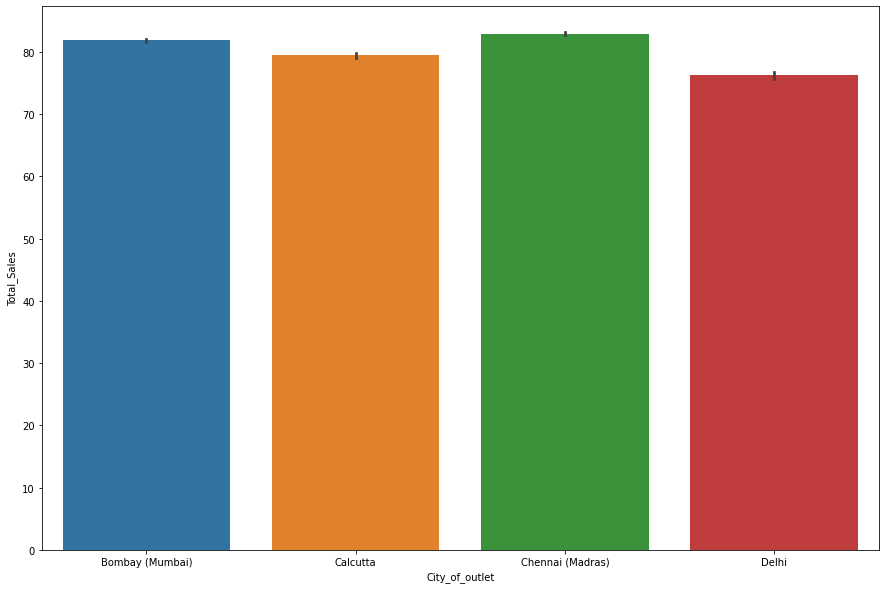

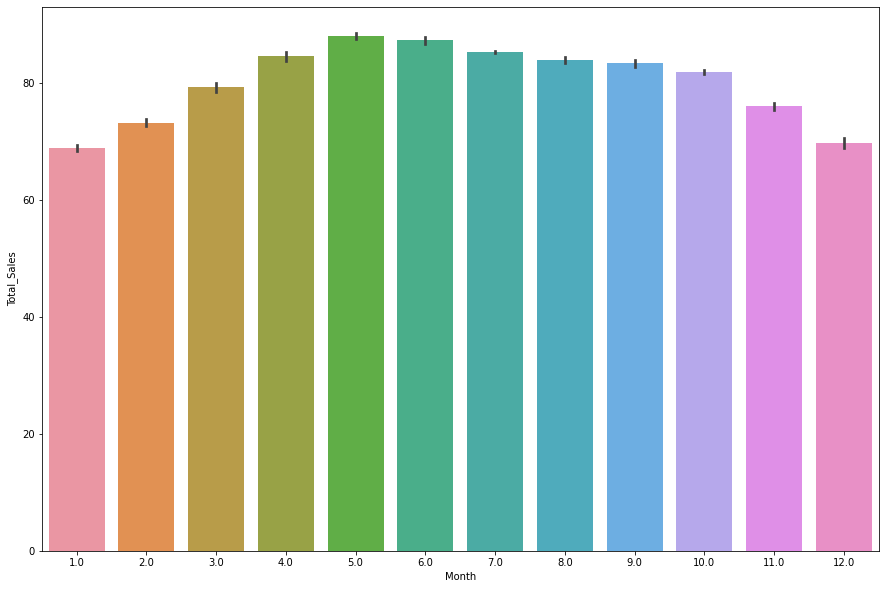

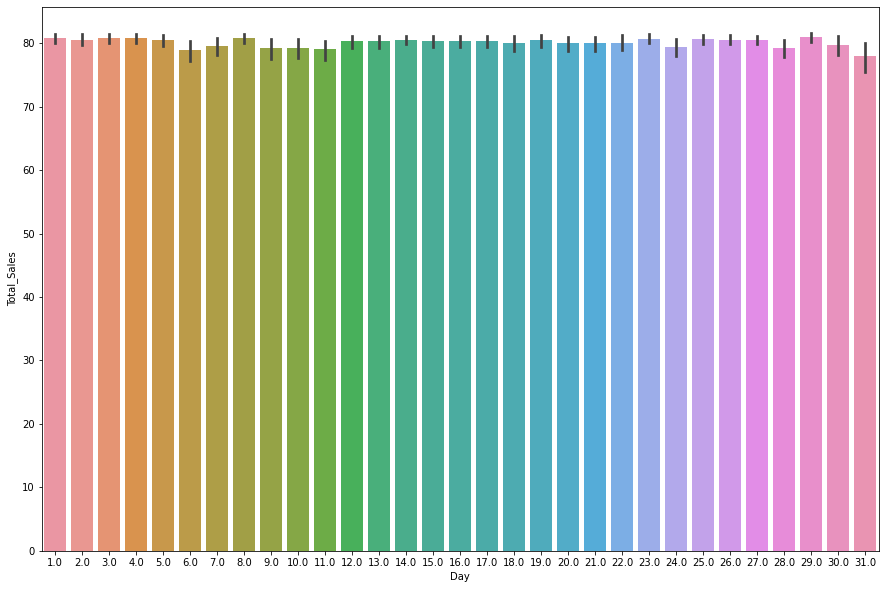

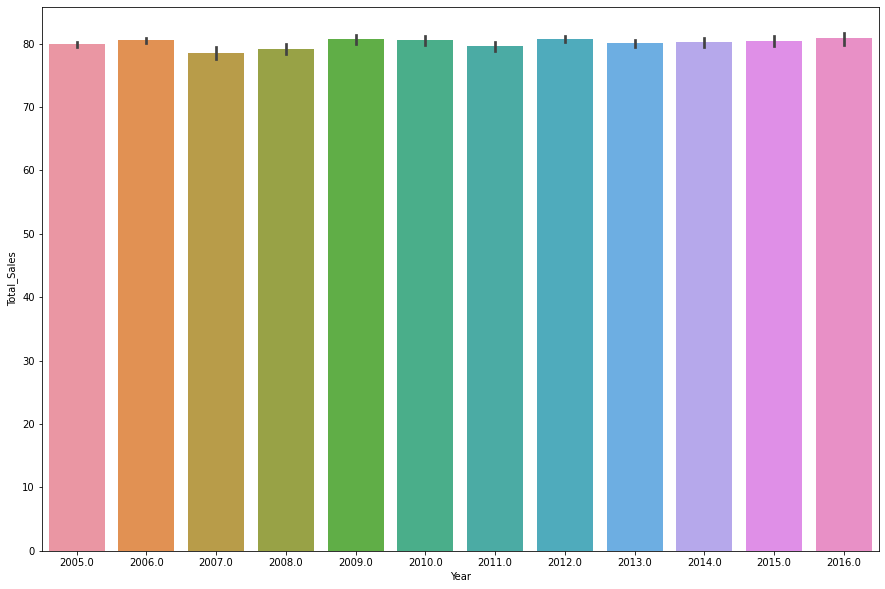

In [ ]:
for i in df[[ 'City_of_outlet', 'Month', 'Day', 'Year']]:
    sns.barplot(df[i],df['Total_Sales'])
    plt.show()

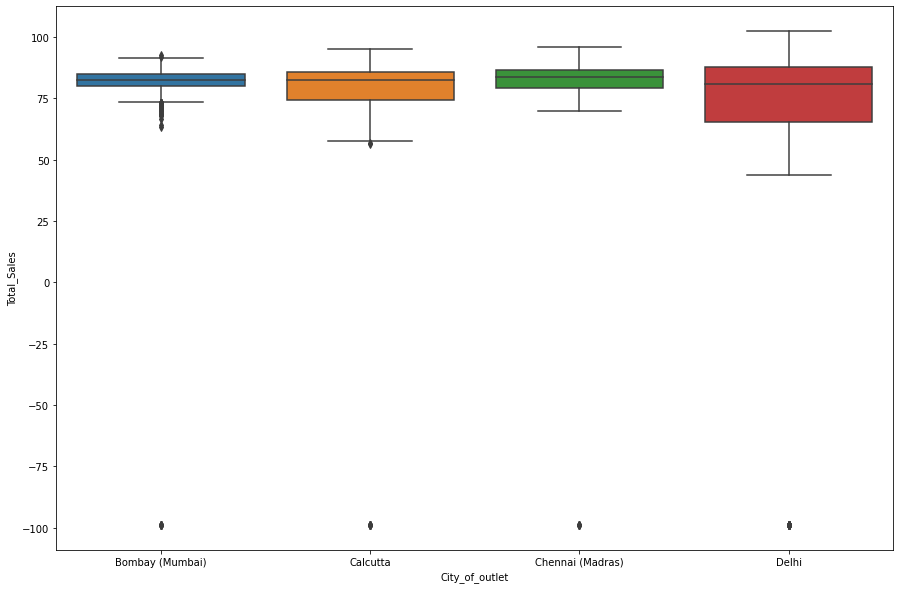

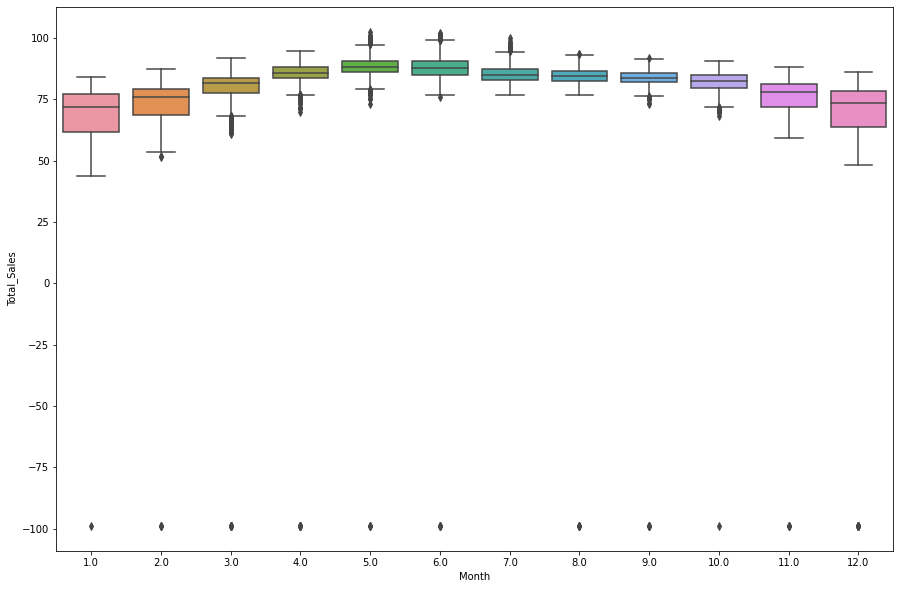

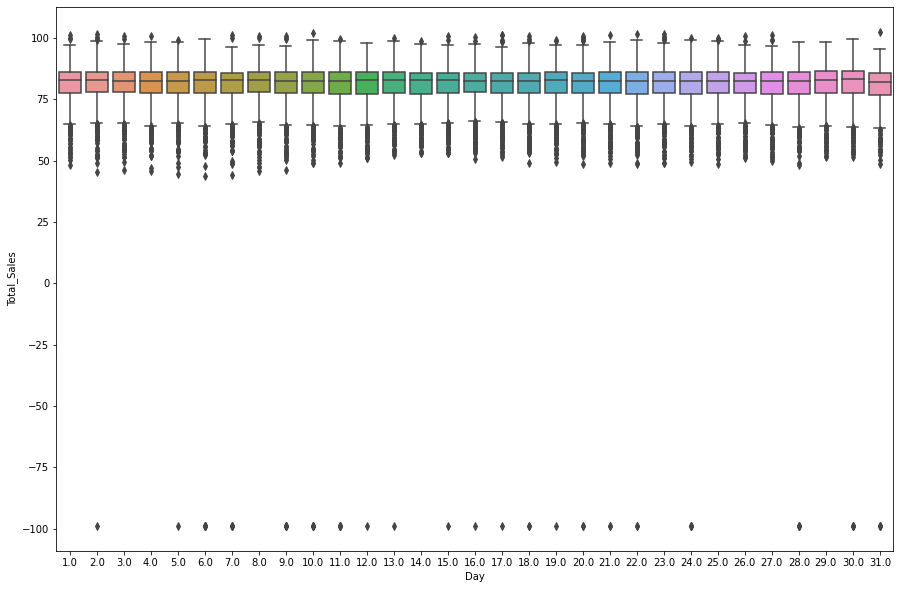

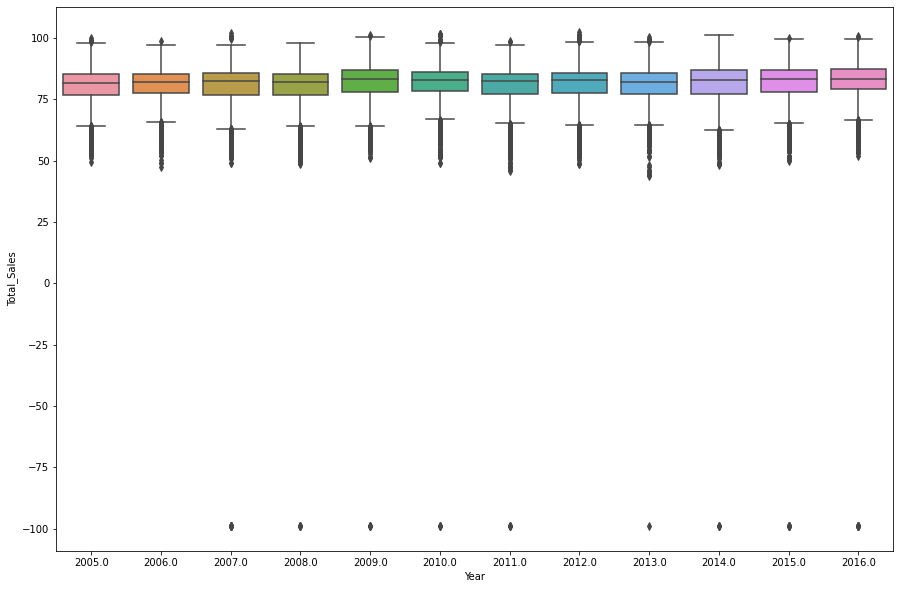

In [ ]:
for i in df[[ 'City_of_outlet', 'Month', 'Day', 'Year']]:
    sns.boxplot(df[i],df['Total_Sales'])
    plt.show()

In [ ]:
df.shape

(17536, 7)

In [ ]:
# dropping insignificant features
data = df.drop(['HQ', 'Country', 'City_of_outlet'], axis=1)

In [ ]:
#checking unique values
data.nunique()

Month           12
Day             31
Year            12
Total_Sales    539
dtype: int64

In [ ]:
# storing data in new variable
sale = data

In [ ]:
# converting month, day, year in right Date format
from datetime import datetime
sale['Date'] = sale.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)

In [ ]:
# dropping month, day, year because we have those columns in Date column
sale.drop(['Month','Day','Year'], axis=1, inplace = True)

In [ ]:
# groupby the date value to get the sales sum of each day
sale = sale.groupby('Date')['Total_Sales'].sum().reset_index()

In [ ]:
sale.head()

,Date,Total_Sales
0,2005-01-01,275.5
1,2005-01-02,275.5
2,2005-01-03,278.6
3,2005-01-04,279.3
4,2005-01-05,281.4


In [ ]:
# setting date as an index
sale.set_index('Date', inplace = True)

In [ ]:
#checking converted format
sale.head()

,Total_Sales
Date,
2005-01-01,275.5
2005-01-02,275.5
2005-01-03,278.6
2005-01-04,279.3
2005-01-05,281.4


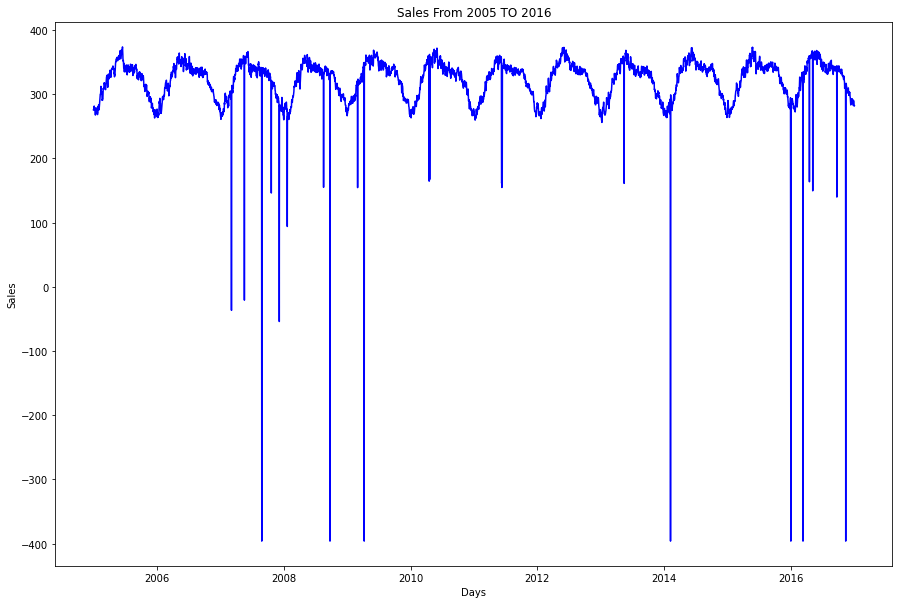

In [ ]:
# Plotting Given Data
plt.plot(sale, color = 'blue')
plt.title('Sales From 2005 TO 2016')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

### Building a LSTM Model with Evaluation Metric "MAE".

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

# load the dataset
dataframe = sale
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 365 # considering last year for forecasting
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
aa = model.fit(trainX, trainY, epochs = 50, batch_size = 34, verbose=2)

Train on 2570 samples
Epoch 1/50
2570/2570 - 3s - loss: 0.0339 - mae: 0.1027
Epoch 2/50
2570/2570 - 0s - loss: 0.0025 - mae: 0.0291
Epoch 3/50
2570/2570 - 0s - loss: 0.0025 - mae: 0.0272
Epoch 4/50
2570/2570 - 0s - loss: 0.0024 - mae: 0.0261
Epoch 5/50
2570/2570 - 0s - loss: 0.0024 - mae: 0.0251
Epoch 6/50
2570/2570 - 0s - loss: 0.0022 - mae: 0.0227
Epoch 7/50
2570/2570 - 0s - loss: 0.0021 - mae: 0.0209
Epoch 8/50
2570/2570 - 0s - loss: 0.0021 - mae: 0.0208
Epoch 9/50
2570/2570 - 0s - loss: 0.0021 - mae: 0.0199
Epoch 10/50
2570/2570 - 0s - loss: 0.0021 - mae: 0.0200
Epoch 11/50
2570/2570 - 0s - loss: 0.0021 - mae: 0.0190
Epoch 12/50
2570/2570 - 0s - loss: 0.0019 - mae: 0.0175
Epoch 13/50
2570/2570 - 0s - loss: 0.0021 - mae: 0.0190
Epoch 14/50
2570/2570 - 0s - loss: 0.0020 - mae: 0.0179
Epoch 15/50
2570/2570 - 0s - loss: 0.0020 - mae: 0.0183
Epoch 16/50
2570/2570 - 0s - loss: 0.0021 - mae: 0.0194
Epoch 17/50
2570/2570 - 0s - loss: 0.0020 - mae: 0.0189
Epoch 18/50
2570/2570 - 0s - loss: 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                83200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 83,251
Trainable params: 83,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# checking the metrics of model
xxx = aa.history
xxx.keys()

dict_keys(['loss', 'mae'])

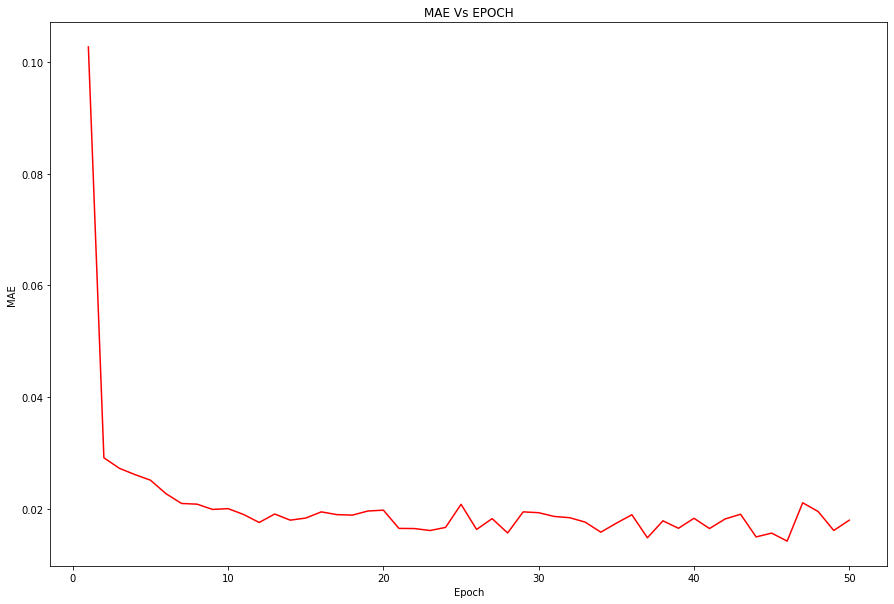

In [ ]:
epoch = np.arange(1,51)
plt.plot(epoch, aa.history['mae'],color='r')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE Vs EPOCH')
plt.show()

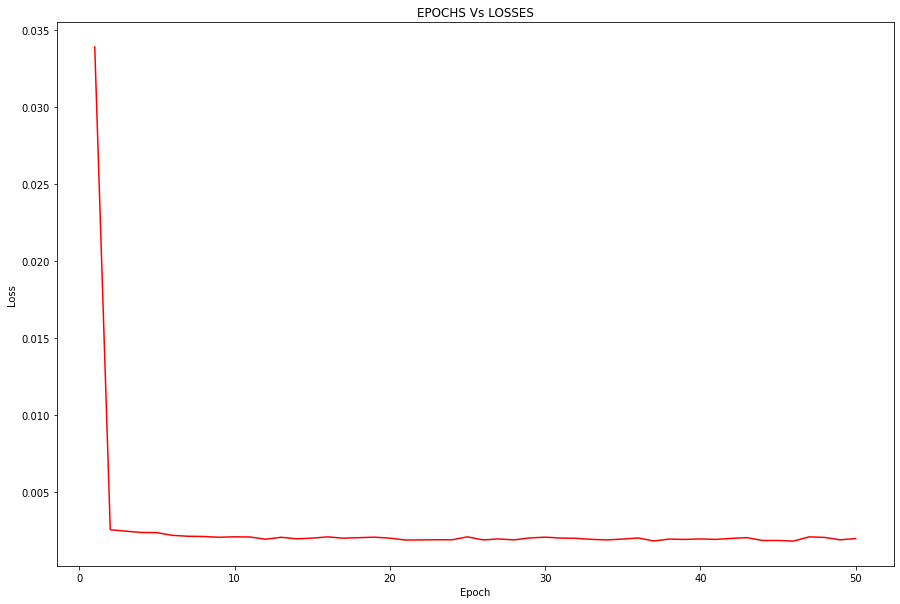

In [ ]:
epoch = np.arange(1,51)
plt.plot(epoch, aa.history['loss'],color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('EPOCHS Vs LOSSES')
plt.show()

### Making The Predictions

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate Mean Absolute Error
trainScore = (mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MAE' % (trainScore))
testScore = (mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MAE' % (testScore))

Train Score: 10.62 MAE
Test Score: 12.99 MAE


In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 32.40 RMSE
Test Score: 46.33 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

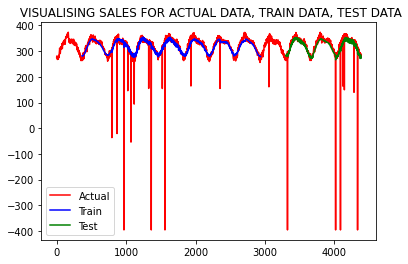

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), color = 'r', label = 'Actual')
plt.plot(trainPredictPlot, color = 'b', label = 'Train')
plt.plot(testPredictPlot , color = 'g', label = 'Test')
plt.title(' VISUALISING SALES FOR ACTUAL DATA, TRAIN DATA, TEST DATA')
plt.legend()
plt.show()

### Forcasting Sales For The Years 2017 and 2018

In [ ]:
# considering last one year data for forecasting
xx = trainPredict.ravel()
yy = xx[-366:-1]
len(yy)

365

In [ ]:
yy

array([287.18823, 287.29813, 287.04504, 287.38733, 287.59683, 286.72314,
       286.69162, 286.3197 , 286.8729 , 286.3395 , 285.907  , 285.4141 ,
       285.8523 , 286.59622, 288.39987, 288.09613, 289.32895, 288.34134,
       288.21466, 287.58423, 288.089  , 288.23813, 288.957  , 289.09018,
       291.1969 , 293.33832, 292.48068, 294.1298 , 294.00974, 293.17117,
       292.97324, 294.53275, 294.85284, 295.39874, 296.47375, 297.14645,
       297.0942 , 296.88068, 298.04028, 298.11935, 298.3168 , 299.72498,
       299.88016, 299.32187, 300.33542, 301.85385, 301.95715, 302.93365,
       303.96997, 305.877  , 306.5975 , 308.38766, 308.91217, 309.374  ,
       308.0277 , 308.60608, 308.9738 , 309.33505, 310.29025, 312.00357,
       313.0734 , 314.0843 , 314.1728 , 315.71555, 315.41425, 315.69302,
       315.77274, 317.55234, 317.0358 , 318.8875 , 320.7552 , 322.45752,
       322.5976 , 321.98676, 321.93823, 321.41565, 320.5081 , 320.7529 ,
       322.4509 , 322.86234, 323.35895, 324.80984, 

In [ ]:
x_input = yy
n_steps = 365
temp_input=list(x_input)
lst_output=[] # forecasted values storing in this list
i=0
n_features = 1
while(i<730):
    
    if(len(temp_input)>len(yy)):
        x_input=array(temp_input[1:])
        print("--"*25)
        print("{} - day input : {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_features,  n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} - day output : {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_features, n_steps))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print()    
print("FINAL 730 DAY OUTPUT")
print(lst_output)

Streaming output truncated to the last 5000 lines.
  0.7705276   0.7690794   0.778905    0.8042109   0.81317526  0.8220407
  0.83279455  0.8410842   0.8240394   0.8267717   0.8245748   0.84954405
  0.86042756  0.89099234  0.8862514   0.87109375  0.8704507   0.87606776
  0.8727681   0.8782639   0.8777046   0.873704    0.8648861   0.87439275
  0.86142886  0.9074016   0.8859338   0.89834505  0.90122104  0.89686006
  0.902823    0.9126911   0.9081953   0.9046852   0.8997171   0.9139673
  0.92454505  0.9376946   0.95565265  0.94758546  0.95956653  0.96043587
  0.9596113   0.9790621   0.9815396   0.9858386   1.0083256   0.9913661
  0.99113756  1.0086541   1.0153136   1.0248442   1.0320407   1.0384264
  1.0567459   1.0604466   1.0807539   1.0628798   1.0675868   1.0646107
  1.0654275   1.0710263   1.0978196   1.0879717   1.0985343   1.0879233
  1.0913835   1.1164163   1.1174877   1.1447488   1.1472075   1.1383276
  1.1453792   1.1697896   1.17481     1.1927924   1.202312    1.2184564
  1.2074

In [ ]:
# forecasted sales in normalized form , so we have to convert back to original value
new = scaler.inverse_transform(np.array(lst_output).reshape(-1,1))

In [ ]:
# returns an output value upto 6 decimals
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
new

array([[ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 3.17891418e+02],
       [ 2.74721497e+02],
       [ 2.0

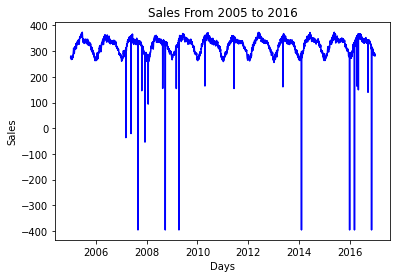

In [ ]:
#Scales From 2005 TO 2016

plt.plot(sale.index , scaler.inverse_transform(dataset), color = 'b')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Sales From 2005 to 2016')
plt.show()



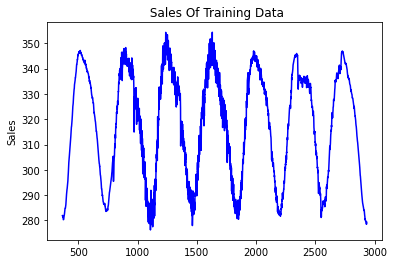

In [ ]:
#Sales From Training Data

plt.plot(trainPredictPlot, color = 'b', label = 'Train')
plt.ylabel('Sales')
plt.title(' Sales Of Training Data')
plt.show()

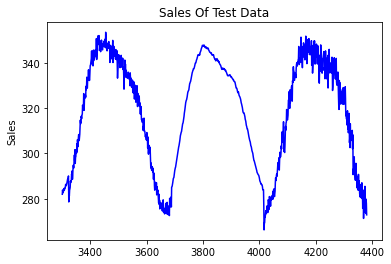

In [ ]:
#Sales of test data

plt.plot(testPredictPlot, color = 'b', label = 'Train')
plt.ylabel('Sales')
plt.title('Sales Of Test Data')
plt.show()

### Creating DataFrame With Forecasted Values From 2017-2018

In [ ]:
# Creating DataFrame With Forecasted Values From 2017-2018
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)
dates = []
start_dt = date(2017, 1, 1)
end_dt = date(2018, 12, 31)
for dt in daterange(start_dt, end_dt):
    dates.append(dt.strftime("%Y-%m-%d"))

In [ ]:
dates = pd.DataFrame(dates)
dates.columns = ['Date']

In [ ]:
dates.head()

,Date
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05


In [ ]:
len(dates)

730

In [ ]:
dates['Sales'] = out
dates.set_index('Date', inplace = True)

In [ ]:
dates

,Sales
Date,
2017-01-01,317.89
2017-01-02,317.89
2017-01-03,317.89
2017-01-04,317.89
2017-01-05,317.89
...,...
2018-12-27,354.86
2018-12-28,355.38
2018-12-29,354.47


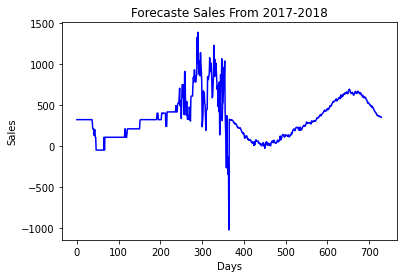

In [ ]:
# plotting forecasted sales 2017-2018
plt.plot(out, color = 'b')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Forecaste Sales From 2017-2018')
plt.show()

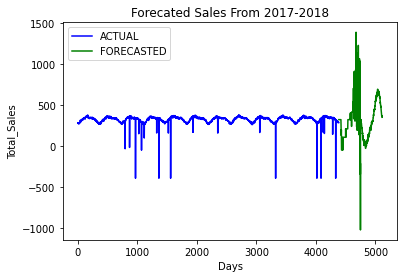

In [ ]:
# prediction for next 2 years from 2017 to 2018 (365 + 365  = 730)
plt.plot(scaler.inverse_transform(dataset), color='b',label = 'ACTUAL')
pltx = np.arange(len(scaler.inverse_transform(dataset)) +1, len(scaler.inverse_transform(dataset))+730+1)
plt.plot( pltx,out, color='g',label = 'FORECASTED')
plt.xlabel('Days')
plt.ylabel('Total_Sales')
plt.title('Forecated Sales From 2017-2018')
plt.legend()
plt.show()

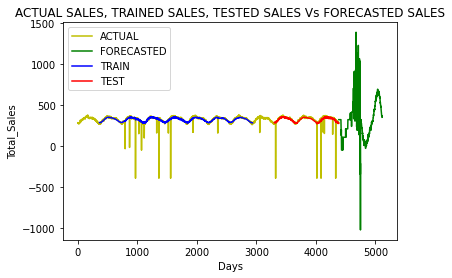

In [ ]:
# FORECASTED SALES, ACTUAL SALES, TRAINED SALES, TESTED SALES
plt.plot(scaler.inverse_transform(dataset), color='y',label = 'ACTUAL')
pltx = np.arange(len(scaler.inverse_transform(dataset)) +1, len(scaler.inverse_transform(dataset))+730+1)
plt.plot( pltx,out, color='g',label = 'FORECASTED')
plt.plot(trainPredictPlot, color = 'b', label = 'TRAIN')
plt.plot(testPredictPlot , color = 'r', label = 'TEST')
plt.xlabel('Days')
plt.ylabel('Total_Sales')
plt.title('ACTUAL SALES, TRAINED SALES, TESTED SALES Vs FORECASTED SALES')
plt.legend()
plt.show()